# **Examples of Plotting Experimental HVC V(t) and I(t) Fourier Power Spectrum, and Effect of Step Functions on Spectrum**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from current_voltage_Fourier_power_spectrum_and_plot import produce_IV_Fourier_power_spectrum_and_plot
import warnings; warnings.simplefilter('ignore')

Demonstration of how to correctly make a Fourier power spectrum (FPS) plot and associated I(t) and V(t) plots. 
Do this by calling 
current_voltage_Fourier_power_spectrum_and_plot.py's
method produce_IV_Fourier_power_spectrum_and_plot()

These data are from Arij Daou's 2015 HVC data folder. All sampled at 50kHz.
Data directory on KAM:
/volume1/homes/adaou/In Vitro/50 KhZ data/50 KhZ Recordings - 11_10_15/

We will test on three x-projecting neurons: Neuron 12, Neuron 15, and Neuron 42.
In addition to showing how to use the code, this also explores the question of whether omitting the step function data from a mostly chaotic stimulus file is necessary to draw conclusions from the FPS plot.

Summary: The FPS plots, whether step functions in I(t) and their responses in V(t) are omitted or not before calculating the FPS, remain similar. The biggest differences appear in the low frequencies (because of the straight-ish lines of step functions). In both cases (omission and no omission) the I(t) FPS are inconsistent with V(t) FPS. The I(t) FPS have much more high frequency power than the V(t) FPS. 

This also suggests previous FPS plots which use the whole dataset (and don't omit step functions) likely remain valid substitutes for those without step function omissions.

## Neuron 12 (HVCx-projecting)

nidaq_Dev1_ai-00023
nidaq_Dev1_ai-00023


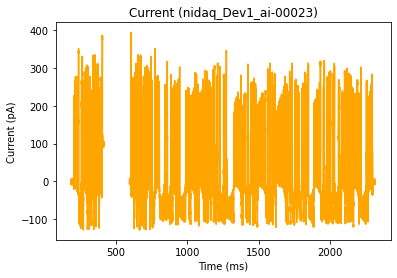

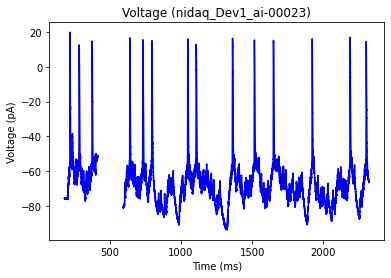

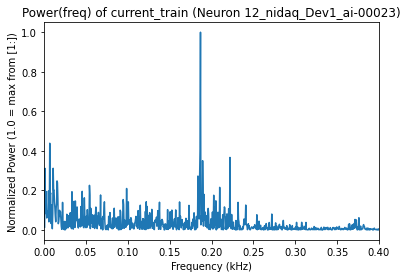

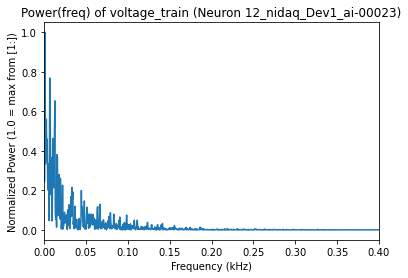

In [2]:
# Basic Plotting
save_and_or_display = "display"
neuron_number = "12" # This is an x-projecting neuron
episode_number = "00023"

# everything in filename except "_voltage.png" for instance. Used as neuron name
a_filename_pretext = "nidaq_Dev1_ai-"+episode_number 

neuron_directory = "HVC_ra_x_i_data_2015/50 KhZ Recordings/Neuron "+neuron_number
V = np.loadtxt(neuron_directory +"/"+ a_filename_pretext+"_voltage.txt")
I = np.loadtxt(neuron_directory +"/"+ a_filename_pretext+"_current.txt")
freq_units = "kHz" # frequency units

sampling_rate = 50.0 # kHz (1/ms)
delta_t = 1.0/sampling_rate  # this is milliseconds (1.0/50kHz= 0.02ms)
num_timesteps = V.shape[0]
t_final = num_timesteps * delta_t  # measured in ms
t_arr = np.arange(start=0, stop= t_final, step= delta_t) # units: ms

xlim = (0,0.4)

# Reduce array to only important timesteps to be analyzed. Will be removed from V and I and/or set to nan in
# function produce_IV_Fourier_power_spectrum_and_plot()
remove_indices = True
range_list = [range(116000,t_arr.shape[0]),
                  range(20800,29700),
                  range(0,9100)
              ]

# Finally, produce the I(t) and V(t) plots, and their Fourier power spectrum plots:
FPS_list_omission, freq_array_omission = produce_IV_Fourier_power_spectrum_and_plot(V,I,range_list,t_arr,
                                                                                    a_filename_pretext,freq_units,
                                           neuron_name=neuron_number, remove_indices=remove_indices, xlim=xlim,
                                           save_and_or_display = save_and_or_display)

On a side note, the current up close looks something like L63, but not exactly:

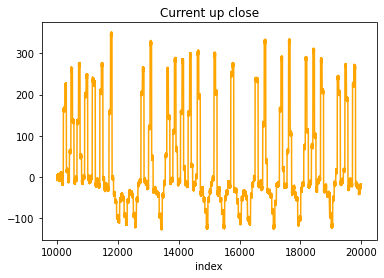

In [3]:
plt.figure()
plt.plot(range(10000,20000),I[10000:20000], "orange")
plt.title("Current up close")
plt.xlabel("index")
plt.show()

The profiles of the I(t) FPS and V(t) FPS differ remarkably, which means that the neuron's voltage V(t) is not exhibiting high frequency responses to the high frequency components of stimulus I(t).

Note for the I(t) and V(t) graphs, the reason for the gap is that I replaced those step function regions with NaNs.
The FPS calculations use a version of the original I(t) and V(t) arrays without NaNs. The regions were just removed entirely (not replaced with NaNs or zeros) and the chaotic stimulus parts just concatenated.

Demonstration of FPS for the same file as above when none of the step functions are omitted from V(t) and I(t):

nidaq_Dev1_ai-00023
nidaq_Dev1_ai-00023


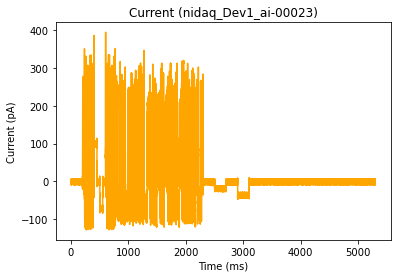

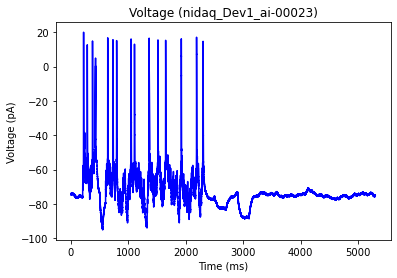

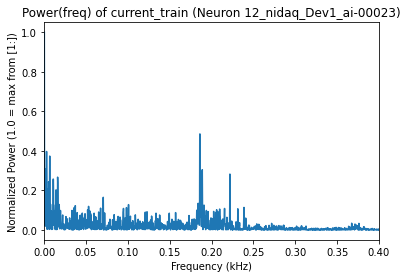

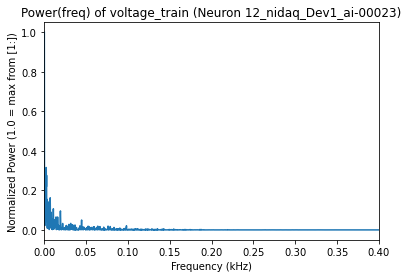

In [4]:
remove_indices=False
FPS_list_no_omission, freq_array_no_omission = produce_IV_Fourier_power_spectrum_and_plot(V,I,range_list,t_arr,
                                                                                          a_filename_pretext,freq_units,
                                           neuron_name=neuron_number, remove_indices=remove_indices, xlim=xlim,
                                           save_and_or_display = save_and_or_display)


By comparing the power spectra distributions (with and without removed ranges), it is clear that the shape of the distribution is not changed much. However, there is a lot more power at the lowest frequencies.

The current FPS has noticeably much more low frequency components when the relatively flat parts of I(t) are included, but the FPS profiles with no omission do not differ much from the FPS profiles with omission at medium and high frequencies. So if we need to save time by not specifying which timesteps to remove from our FPS, we know that the FPS at medium and high frequencies will be somewhat accurate. Let's plot this quantitatively, instead of just relying on our eyes:

Same length FPS? False


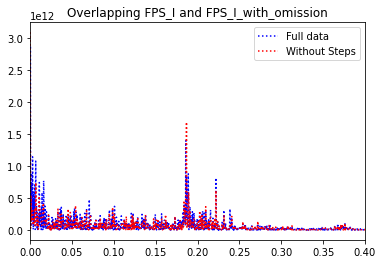

In [5]:
# Quantities here will not remove first element, unlike in plots above. Otherwise the same data though.
# Checking that the freq array for omission and no omission are the same:
print("Same length FPS? "+str(freq_array_no_omission.shape[0] ==freq_array_omission.shape[0]))
# The FPS are not the same, which makes sense because the omission I(t) array has fewer elements

FPS_I_no_omission = FPS_list_no_omission[0]
FPS_I_omission = FPS_list_omission[0]
plt.figure()
plt.plot(freq_array_no_omission, FPS_I_no_omission, "b:",label="Full data")
plt.plot(freq_array_omission, FPS_I_omission,"r:",label="Without Steps")
plt.title("Overlapping FPS_I and FPS_I_with_omission")
plt.xlim((0,0.4))
plt.legend()
plt.show()

# we may be tempted to do the following calculation, but it's not appropriate because the frequency arrays are not the same 
# length:
# plt.figure()
# x_range = 49000
# square_difference = np.square(FPS_I_no_omission[:x_range] - FPS_I_omission[:x_range])
# square_difference /= np.max(square_difference)
# plt.plot(freq_array_omission[:x_range], square_difference,"green")
# plt.title("Square Difference (Normalized)")
# plt.xlim((0,0.4))
# plt.show()

This makes the difference in FPS at low frequencies much clearer.

## Neuron 15 (HVCx-projecting)

We will now check the I and V FPS for another x-projecting neuron, Neuron 15.

In [6]:
del I, V, FPS_list_omission, FPS_list_no_omission, freq_array_omission, freq_array_no_omission #clearing old variables in case

nidaq_Dev1_ai-00023
nidaq_Dev1_ai-00023


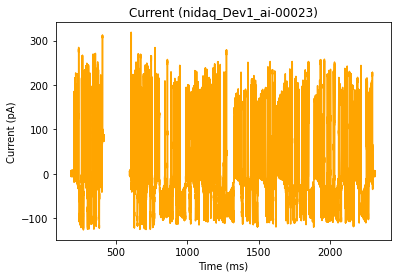

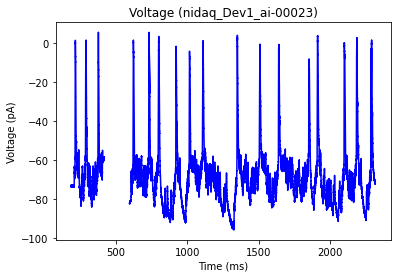

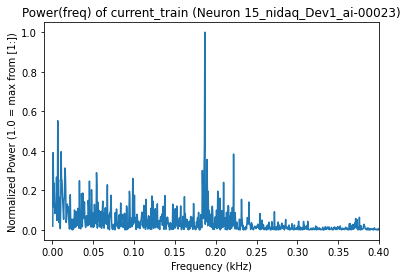

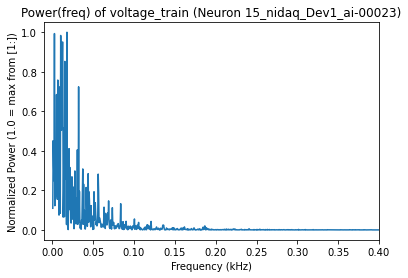

In [7]:
# Basic Plotting
save_and_or_display = "display"
neuron_number = "15" # This is also an x-projecting neuron
episode_number = "00023"

# everything in filename except "_voltage.png" for instance. Used as neuron name
a_filename_pretext = "nidaq_Dev1_ai-"+episode_number 

neuron_directory = "HVC_ra_x_i_data_2015/50 KhZ Recordings/Neuron "+neuron_number
V = np.loadtxt(neuron_directory +"/"+ a_filename_pretext+"_voltage.txt")
I = np.loadtxt(neuron_directory +"/"+ a_filename_pretext+"_current.txt")
freq_units = "kHz" # frequency units

sampling_rate = 50.0 # kHz (1/ms)
delta_t = 1.0/sampling_rate  # this is milliseconds (1.0/50kHz= 0.02ms)
num_timesteps = V.shape[0]
t_final = num_timesteps * delta_t  # measured in ms
t_arr = np.arange(start=0, stop= t_final, step= delta_t) # units: ms

xlim = (-0.01,0.4)

# Reduce array to only important timesteps to be analyzed. Will be removed from V and I and/or set to nan in
# function produce_IV_Fourier_power_spectrum_and_plot()
remove_indices = True
range_list = [range(116000,t_arr.shape[0]),
                  range(20800,29700),
                  range(0,9100)
              ]

# Finally, produce the I(t) and V(t) plots, and their Fourier power spectrum plots:
FPS_list_omission, freq_array_omission = produce_IV_Fourier_power_spectrum_and_plot(V,I,range_list,t_arr,a_filename_pretext,
                                                                                    freq_units,
                                           neuron_name=neuron_number, remove_indices=remove_indices, xlim=xlim,
                                           save_and_or_display = save_and_or_display)


The external stimulating currents for neurons 12 and 15 appear to be the same, so of course their currents' Fourier power spectra are the same. However, their response V(t) are somewhat different, so of course their voltage FPS are different as well.

Just as with Neuron 12, let's see if Neuron 15's FPS for I(t) and V(t) with no omissions differs much from the FPS above (which has omissions):

nidaq_Dev1_ai-00023
nidaq_Dev1_ai-00023


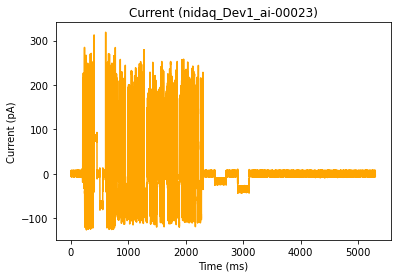

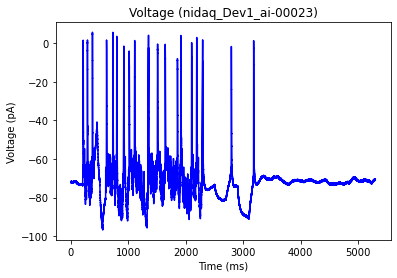

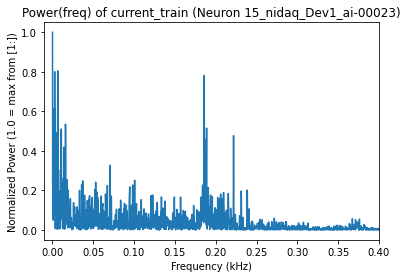

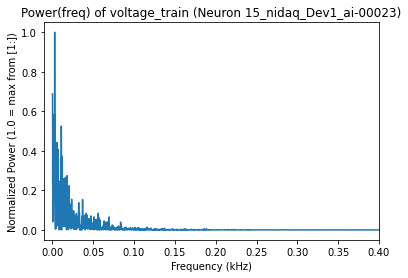

In [8]:
remove_indices=False
FPS_list_no_omission, freq_array_no_omission = produce_IV_Fourier_power_spectrum_and_plot(V,I,range_list,t_arr,
                                                                                          a_filename_pretext,freq_units,
                                           neuron_name=neuron_number, remove_indices=remove_indices, xlim=xlim,
                                           save_and_or_display = save_and_or_display)


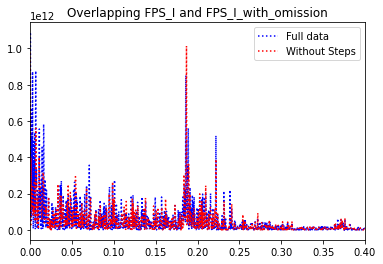

In [9]:
# Quantities here will not remove first element, unlike in plots above. Otherwise the same data though.

FPS_I_no_omission = FPS_list_no_omission[0]
FPS_I_omission = FPS_list_omission[0]
plt.figure()
plt.plot(freq_array_no_omission, FPS_I_no_omission, "b:",label="Full data")
plt.plot(freq_array_omission, FPS_I_omission,"r:",label="Without Steps")
plt.title("Overlapping FPS_I and FPS_I_with_omission")
plt.xlim((0,0.4))
plt.legend()
plt.show()


Let's try one more time, with another HVC-x neuron

## Neuron 42 (HVCx-projecting)

In [10]:
del I, V, FPS_list_omission, FPS_list_no_omission, freq_array_omission, freq_array_no_omission #clearing old variables in case

nidaq_Dev1_ai-00023
nidaq_Dev1_ai-00023


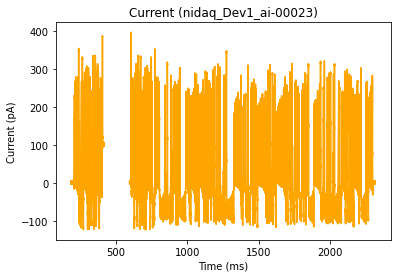

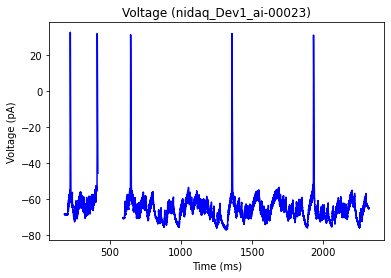

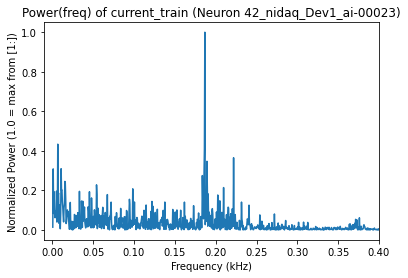

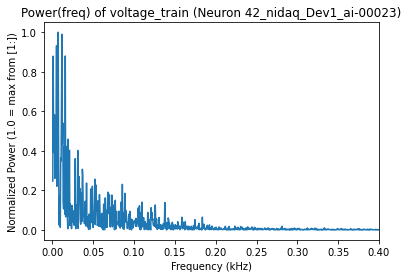

In [11]:
# Basic Plotting
save_and_or_display = "display"
neuron_number = "42" # This is also an x-projecting neuron
episode_number = "00023"

# everything in filename except "_voltage.png" for instance. Used as neuron name
a_filename_pretext = "nidaq_Dev1_ai-"+episode_number 

neuron_directory = "HVC_ra_x_i_data_2015/50 KhZ Recordings/Neuron "+neuron_number
V = np.loadtxt(neuron_directory +"/"+ a_filename_pretext+"_voltage.txt")
I = np.loadtxt(neuron_directory +"/"+ a_filename_pretext+"_current.txt")
freq_units = "kHz" # frequency units

sampling_rate = 50.0 # kHz (1/ms)
delta_t = 1.0/sampling_rate  # this is milliseconds (1.0/50kHz= 0.02ms)
num_timesteps = V.shape[0]
t_final = num_timesteps * delta_t  # measured in ms
t_arr = np.arange(start=0, stop= t_final, step= delta_t) # units: ms

xlim = (-0.01,0.4)

# Reduce array to only important timesteps to be analyzed. Will be removed from V and I and/or set to nan in
# function produce_IV_Fourier_power_spectrum_and_plot()
remove_indices = True
range_list = [range(116000,t_arr.shape[0]),
                  range(20800,29700),
                  range(0,9100)
              ]

# Finally, produce the I(t) and V(t) plots, and their Fourier power spectrum plots:
FPS_list_omission, freq_array_omission = produce_IV_Fourier_power_spectrum_and_plot(V,I,range_list,t_arr,a_filename_pretext,
                                                                                    freq_units,
                                           neuron_name=neuron_number, remove_indices=remove_indices, xlim=xlim,
                                           save_and_or_display = save_and_or_display)


Without omissions:

nidaq_Dev1_ai-00023
nidaq_Dev1_ai-00023


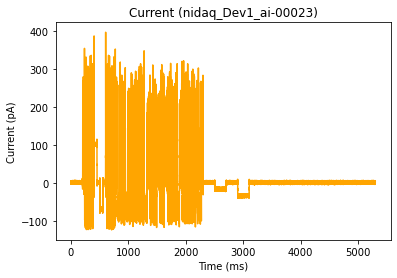

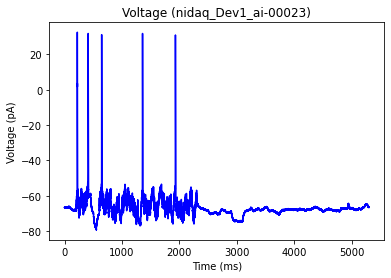

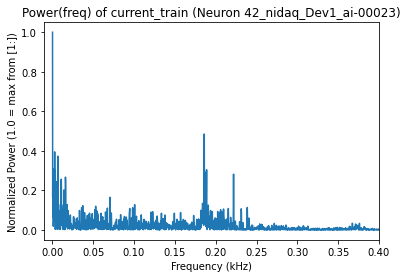

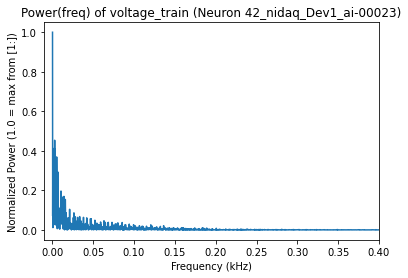

In [12]:
remove_indices=False
FPS_list_no_omission, freq_array_no_omission = produce_IV_Fourier_power_spectrum_and_plot(V,I,range_list,t_arr,
                                                                                          a_filename_pretext,freq_units,
                                           neuron_name=neuron_number, remove_indices=remove_indices, xlim=xlim,
                                           save_and_or_display = save_and_or_display)


Comparison (omission vs no omission):

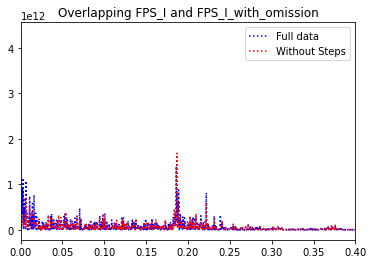

In [13]:
# Quantities here will not remove first element, unlike in plots above. Otherwise the same data though.
FPS_I_no_omission = FPS_list_no_omission[0]
FPS_I_omission = FPS_list_omission[0]
plt.figure()
plt.plot(freq_array_no_omission, FPS_I_no_omission, "b:",label="Full data")
plt.plot(freq_array_omission, FPS_I_omission,"r:",label="Without Steps")
plt.title("Overlapping FPS_I and FPS_I_with_omission")
plt.xlim((0,0.4))
plt.legend()
plt.show()


The low frequency difference is less exaggerated here, but all previous conclusions are consistent with this new set of data.

# Finding V(t) Frequency Response Range for HVCx-projecting, HVC RA-projecting, and HVC interneurons

What is the typical power spectrum range over which V(t) responses exist for each of the three HVC neuron types?

## Neuron 12 (HVCx-projecting)

In [14]:
del I, V, FPS_list_omission, FPS_list_no_omission, freq_array_omission, freq_array_no_omission #clearing old variables in case

nidaq_Dev1_ai-00023
nidaq_Dev1_ai-00023


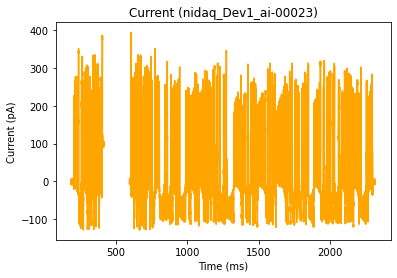

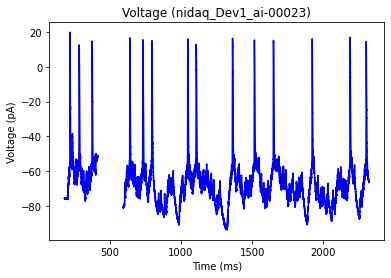

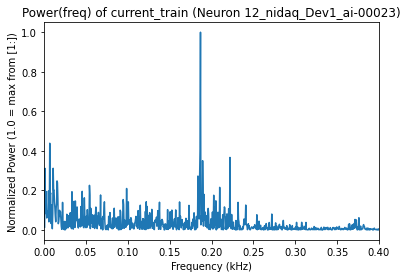

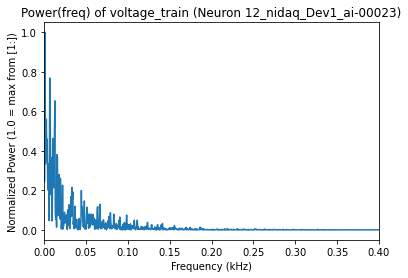

In [15]:
# Basic Plotting
save_and_or_display = "display"
neuron_number = "12" # This is an x-projecting neuron
episode_number = "00023"

# everything in filename except "_voltage.png" for instance. Used as neuron name
a_filename_pretext = "nidaq_Dev1_ai-"+episode_number 

neuron_directory = "HVC_ra_x_i_data_2015/50 KhZ Recordings/Neuron "+neuron_number
V = np.loadtxt(neuron_directory +"/"+ a_filename_pretext+"_voltage.txt")
I = np.loadtxt(neuron_directory +"/"+ a_filename_pretext+"_current.txt")
freq_units = "kHz" # frequency units

sampling_rate = 50.0 # kHz (1/ms)
delta_t = 1.0/sampling_rate  # this is milliseconds (1.0/50kHz= 0.02ms)
num_timesteps = V.shape[0]
t_final = num_timesteps * delta_t  # measured in ms
t_arr = np.arange(start=0, stop= t_final, step= delta_t) # units: ms

xlim = (0,0.4)

# Reduce array to only important timesteps to be analyzed. Will be removed from V and I and/or set to nan in
# function produce_IV_Fourier_power_spectrum_and_plot()
remove_indices = True
range_list = [range(116000,t_arr.shape[0]),
                  range(20800,29700),
                  range(0,9100)
              ]

# Finally, produce the I(t) and V(t) plots, and their Fourier power spectrum plots:
FPS_list_omission, freq_array_omission = produce_IV_Fourier_power_spectrum_and_plot(V,I,range_list,t_arr,
                                                                                    a_filename_pretext,freq_units,
                                           neuron_name=neuron_number, remove_indices=remove_indices, xlim=xlim,
                                           save_and_or_display = save_and_or_display)

Almost all of the response for HVCx-projecting appears to lie within $[0,150]$ Hz.

## Neuron 4 (HVC RA-projecting)

In [16]:
del I, V #clearing old variables as a precaution

nidaq_Dev1_ai-00023
nidaq_Dev1_ai-00023


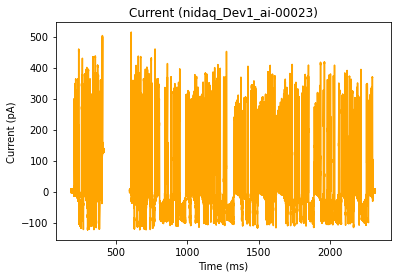

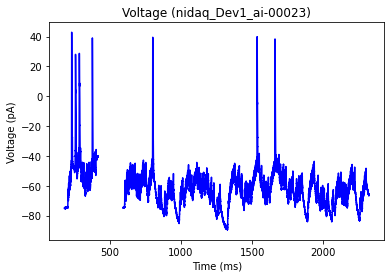

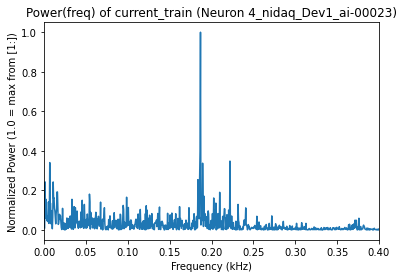

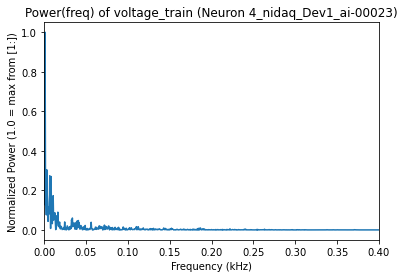

In [17]:
# Basic Plotting
save_and_or_display = "display"
neuron_number = "4" # This is an RA-projecting neuron
episode_number = "00023"

# everything in filename except "_voltage.png" for instance. Used as neuron name
a_filename_pretext = "nidaq_Dev1_ai-"+episode_number 

neuron_directory = "HVC_ra_x_i_data_2015/50 KhZ Recordings/Neuron "+neuron_number
V = np.loadtxt(neuron_directory +"/"+ a_filename_pretext+"_voltage.txt")
I = np.loadtxt(neuron_directory +"/"+ a_filename_pretext+"_current.txt")
freq_units = "kHz" # frequency units

sampling_rate = 50.0 # kHz (1/ms)
delta_t = 1.0/sampling_rate  # this is milliseconds (1.0/50kHz= 0.02ms)
num_timesteps = V.shape[0]
t_final = num_timesteps * delta_t  # measured in ms
t_arr = np.arange(start=0, stop= t_final, step= delta_t) # units: ms

xlim = (0,0.4)

# Reduce array to only important timesteps to be analyzed. Will be removed from V and I and/or set to nan in
# function produce_IV_Fourier_power_spectrum_and_plot()
remove_indices = True
range_list = [range(116000,t_arr.shape[0]),
                  range(20800,29700),
                  range(0,9100)
              ]

# Finally, produce the I(t) and V(t) plots, and their Fourier power spectrum plots:
FPS_list_omission, freq_array_omission = produce_IV_Fourier_power_spectrum_and_plot(V,I,range_list,t_arr,
                                                                                    a_filename_pretext,freq_units,
                                           neuron_name=neuron_number, remove_indices=remove_indices, xlim=xlim,
                                           save_and_or_display = save_and_or_display)

For RA-projecting neurons, the equivalent range for the same stimulus appears to be $[0,50]$ Hz.
A cautionary range would be $[0,30]$ Hz.

Let's check one more RA-projecting neuron.

## Neuron 20 (HVC RA-projecting)

In [18]:
del I, V #clearing old variables as a precaution

nidaq_Dev1_ai-00023
nidaq_Dev1_ai-00023


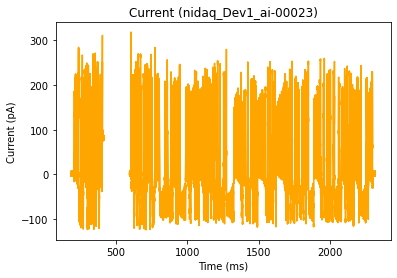

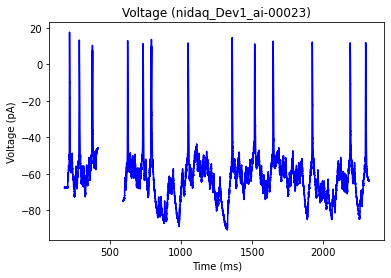

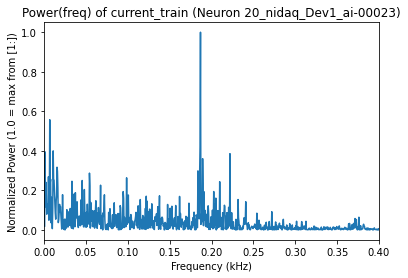

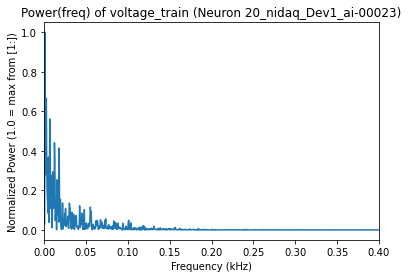

In [19]:
# Basic Plotting
save_and_or_display = "display"
neuron_number = "20" # This is an RA-projecting neuron
episode_number = "00023"

# everything in filename except "_voltage.png" for instance. Used as neuron name
a_filename_pretext = "nidaq_Dev1_ai-"+episode_number 

neuron_directory = "HVC_ra_x_i_data_2015/50 KhZ Recordings/Neuron "+neuron_number
V = np.loadtxt(neuron_directory +"/"+ a_filename_pretext+"_voltage.txt")
I = np.loadtxt(neuron_directory +"/"+ a_filename_pretext+"_current.txt")
freq_units = "kHz" # frequency units

sampling_rate = 50.0 # kHz (1/ms)
delta_t = 1.0/sampling_rate  # this is milliseconds (1.0/50kHz= 0.02ms)
num_timesteps = V.shape[0]
t_final = num_timesteps * delta_t  # measured in ms
t_arr = np.arange(start=0, stop= t_final, step= delta_t) # units: ms

xlim = (0,0.4)

# Reduce array to only important timesteps to be analyzed. Will be removed from V and I and/or set to nan in
# function produce_IV_Fourier_power_spectrum_and_plot()
remove_indices = True
range_list = [range(116000,t_arr.shape[0]),
                  range(20800,29700),
                  range(0,9100)
              ]

# Finally, produce the I(t) and V(t) plots, and their Fourier power spectrum plots:
FPS_list_omission, freq_array_omission = produce_IV_Fourier_power_spectrum_and_plot(V,I,range_list,t_arr,
                                                                                    a_filename_pretext,freq_units,
                                           neuron_name=neuron_number, remove_indices=remove_indices, xlim=xlim,
                                           save_and_or_display = save_and_or_display)

Here it looks to be $[0,100]$ Hz or $[0,120]$ Hz.
A cautionary range would be $[0,50]$ Hz.

## Neuron 10 (HVC Interneuron)

In [20]:
del I, V #clearing old variables as a precaution

nidaq_Dev1_ai-00023
nidaq_Dev1_ai-00023


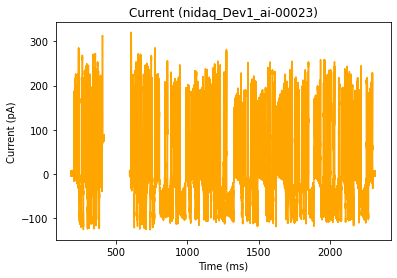

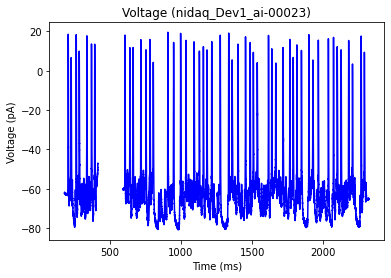

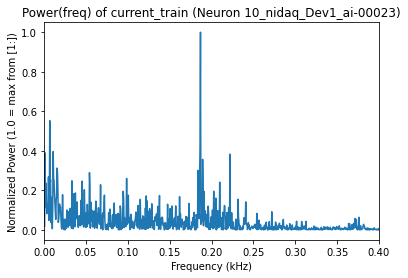

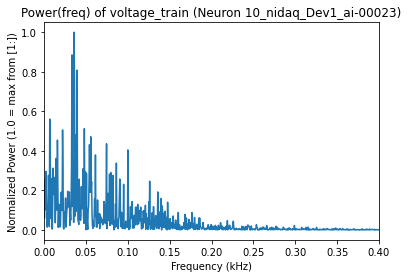

In [21]:
# Basic Plotting
save_and_or_display = "display"
neuron_number = "10" # This is an HVC interneuron
episode_number = "00023"

# everything in filename except "_voltage.png" for instance. Used as neuron name
a_filename_pretext = "nidaq_Dev1_ai-"+episode_number 

neuron_directory = "HVC_ra_x_i_data_2015/50 KhZ Recordings/Neuron "+neuron_number
V = np.loadtxt(neuron_directory +"/"+ a_filename_pretext+"_voltage.txt")
I = np.loadtxt(neuron_directory +"/"+ a_filename_pretext+"_current.txt")
freq_units = "kHz" # frequency units

sampling_rate = 50.0 # kHz (1/ms)
delta_t = 1.0/sampling_rate  # this is milliseconds (1.0/50kHz= 0.02ms)
num_timesteps = V.shape[0]
t_final = num_timesteps * delta_t  # measured in ms
t_arr = np.arange(start=0, stop= t_final, step= delta_t) # units: ms

xlim = (0,0.4)

# Reduce array to only important timesteps to be analyzed. Will be removed from V and I and/or set to nan in
# function produce_IV_Fourier_power_spectrum_and_plot()
remove_indices = True
range_list = [range(116000,t_arr.shape[0]),
                  range(20800,29700),
                  range(0,9100)
              ]

# Finally, produce the I(t) and V(t) plots, and their Fourier power spectrum plots:
FPS_list_omission, freq_array_omission = produce_IV_Fourier_power_spectrum_and_plot(V,I,range_list,t_arr,
                                                                                    a_filename_pretext,freq_units,
                                           neuron_name=neuron_number, remove_indices=remove_indices, xlim=xlim,
                                           save_and_or_display = save_and_or_display)

This V(t) FPS contains higher frequencies than the other two types.
The acceptable range appears to be around $[0,150]$ Hz or $[0,200]$ Hz.
A cautionary range would be $[0,120]$ Hz.

Let's check one more interneuron.

## Neuron 37 (HVC Interneuron)

In [22]:
del I, V #clearing old variables as a precaution

nidaq_Dev1_ai-00023
nidaq_Dev1_ai-00023


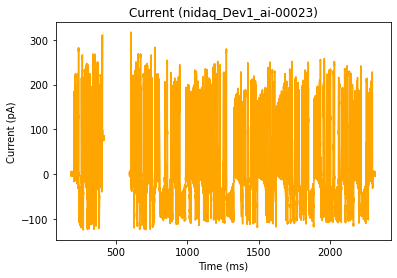

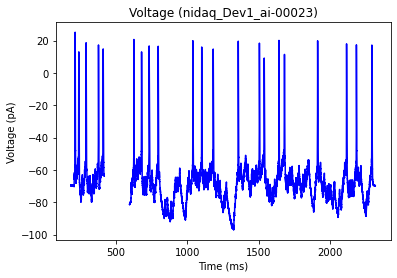

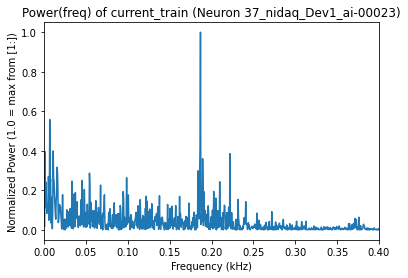

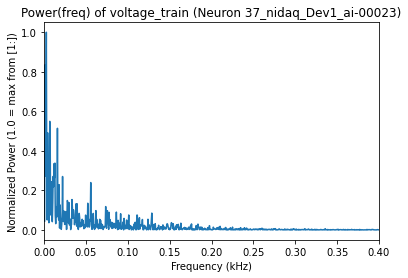

In [23]:
# Basic Plotting
save_and_or_display = "display"
neuron_number = "37" # This is an HVC interneuron
episode_number = "00023"

# everything in filename except "_voltage.png" for instance. Used as neuron name
a_filename_pretext = "nidaq_Dev1_ai-"+episode_number 

neuron_directory = "HVC_ra_x_i_data_2015/50 KhZ Recordings/Neuron "+neuron_number
V = np.loadtxt(neuron_directory +"/"+ a_filename_pretext+"_voltage.txt")
I = np.loadtxt(neuron_directory +"/"+ a_filename_pretext+"_current.txt")
freq_units = "kHz" # frequency units

sampling_rate = 50.0 # kHz (1/ms)
delta_t = 1.0/sampling_rate  # this is milliseconds (1.0/50kHz= 0.02ms)
num_timesteps = V.shape[0]
t_final = num_timesteps * delta_t  # measured in ms
t_arr = np.arange(start=0, stop= t_final, step= delta_t) # units: ms

xlim = (0,0.4)

# Reduce array to only important timesteps to be analyzed. Will be removed from V and I and/or set to nan in
# function produce_IV_Fourier_power_spectrum_and_plot()
remove_indices = True
range_list = [range(116000,t_arr.shape[0]),
                  range(20800,29700),
                  range(0,9100)
              ]

# Finally, produce the I(t) and V(t) plots, and their Fourier power spectrum plots:
FPS_list_omission, freq_array_omission = produce_IV_Fourier_power_spectrum_and_plot(V,I,range_list,t_arr,
                                                                                    a_filename_pretext,freq_units,
                                           neuron_name=neuron_number, remove_indices=remove_indices, xlim=xlim,
                                           save_and_or_display = save_and_or_display)

The acceptable range appears to be around $[0,100]$ Hz or $[0,150]$ Hz.
A cautionary range would be $[0,100]$ Hz.

**In summary:**

Cautionary Ranges:

    - HVC x-projecting: [0,40] Hz
    
    - HVC RA-projecting: [0,50] Hz
    
    - HVC interneuron: [0,100] Hz
    
Max frequency:

    - HVC x-projecting: [0,130] Hz
    
    - HVC RA-projecting: [0,120] Hz
    
    - HVC interneuron: [0,200] Hz
    
These range maxima are of course not hard cutoffs, and the analysis could be improved by averaging over many (more than 2) cells and many external stimuli.

These ranges form guidelines for how the FPS of the stimulating currents should be tuned to get either a current that produces (likely) trainable or (likely) untrainable {I(t),V(t)} pairs for RBF training.